In [1]:
from scipy.stats import wishart
from pylab import *
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Diapositiva 11

Generando un diagrama de dispersión tridimensional para una distribución Wishart mediante una simulación de 1000 iteraciones y 10 grados **de** libertad

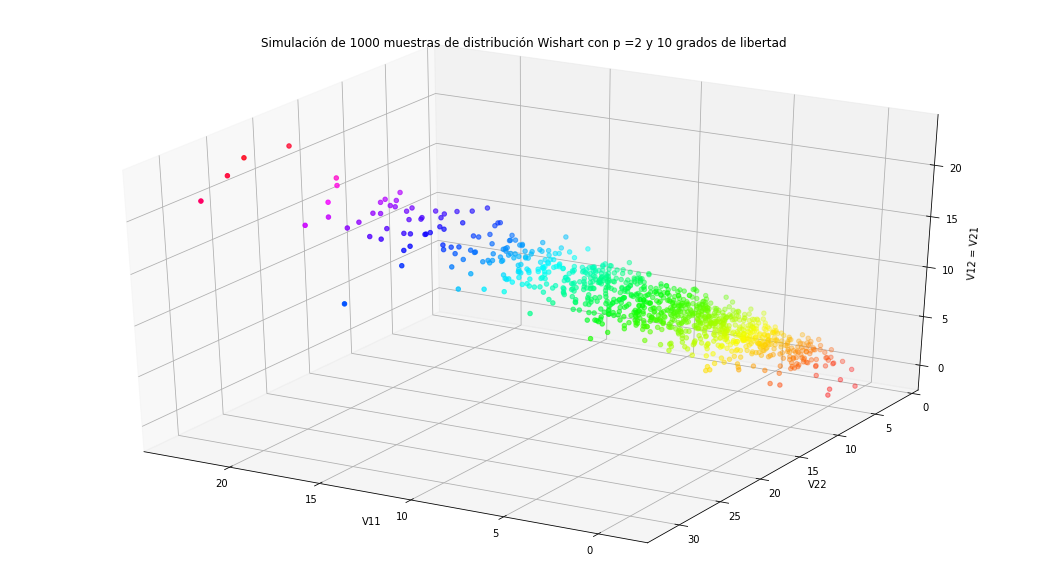

In [218]:
coord_x = []
coord_y = []
coord_z = []
for i in range(0,1000):
    gen_wishart = wishart.rvs(10, [[1,0.75],[0.75,1]],size = 1)
    coord_x.append(gen_wishart[0,1])
    coord_y.append(gen_wishart[1,1])
    coord_z.append(gen_wishart[0,1])

fig = plt.figure()

fig.set_size_inches(18.5, 10.5)


ax = fig.add_subplot(projection='3d')

plt.title("Simulación de 1000 muestras de distribución Wishart con p =2 y 10 grados de libertad")




colors = cm.hsv(coord_z/max(coord_z))

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(coord_z)


ax.scatter(coord_x, coord_y, coord_z, c = colors)
#cb = fig.colorbar(colmap)

ax.set_xlabel('V11')
ax.set_ylabel('V22')
ax.set_zlabel('V12 = V21')

ax.view_init(30, 120)
plt.draw()





plt.show()

Generando un diagrama de dispersión tridimensional para una distribución Wishart mediante una simulación de 1000 iteraciones y 1000 grados de libertad

1.   List item
2.   List item



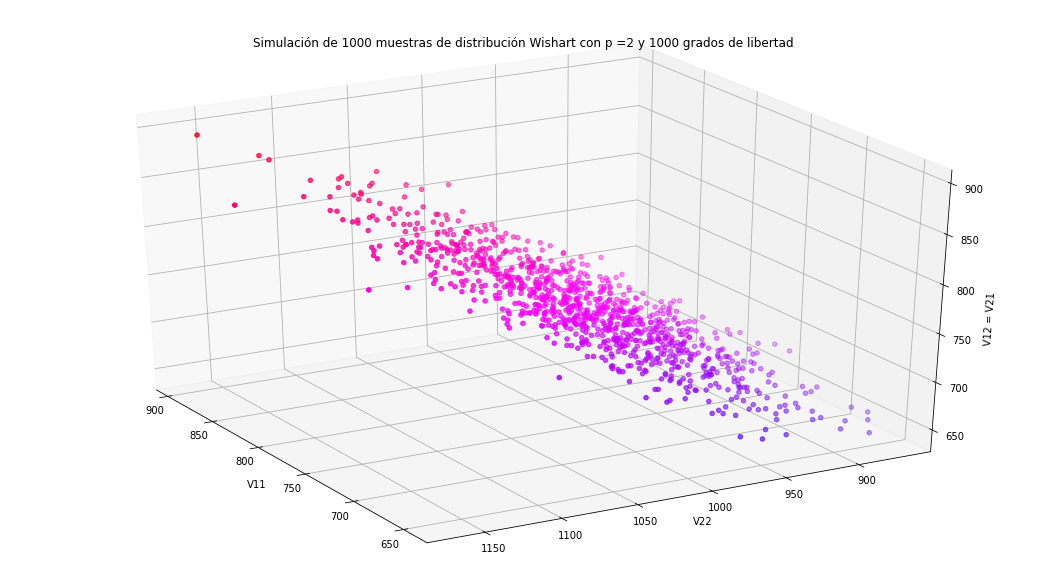

In [219]:
coord_x = []
coord_y = []
coord_z = []
for i in range(0,1000):
    gen_wishart = wishart.rvs(1000, [[1,0.75],[0.75,1]],size = 1)
    coord_x.append(gen_wishart[0,1])
    coord_y.append(gen_wishart[1,1])
    coord_z.append(gen_wishart[0,1])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


fig.set_size_inches(18.5, 10.5)

plt.title("Simulación de 1000 muestras de distribución Wishart con p =2 y 1000 grados de libertad")


colors = cm.hsv(coord_z/max(coord_z))

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(coord_z)


ax.scatter(coord_x, coord_y, coord_z, c = colors)
#cb = fig.colorbar(colmap)

ax.set_xlabel('V11')
ax.set_ylabel('V22')
ax.set_zlabel('V12 = V21')


ax.view_init(30, 150)
plt.draw()

## Diapositiva 15

A continuación se genera un heat mapa para la matriz de correlación de una matriz con entradas generadas mediante una distribución normal estándar de dimensiones de $40 x 10$

In [97]:
p = 40
n = 10
n_40 = np.random.standard_normal(p*n)
n_40 = n_40.reshape(n,p)
#mat_cov_40 = 1/n * np.matmul( n_40.transpose(), n_40)
mat_cov_40 = np.corrcoef(n_40.T)


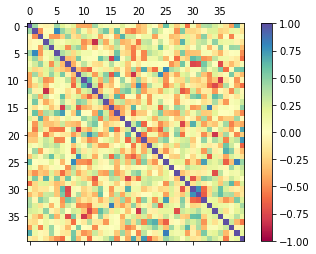

In [98]:
fig, axs = plt.subplots(1,1)
caxs = axs.matshow(mat_cov_40, cmap='Spectral', vmin=-1, vmax=1,interpolation='nearest')
fig.colorbar(caxs)
plt.show()

Se procede a calcular la media y desviación estándar de los valores en la diagonal 

In [99]:
entradas_diag_10 = np.diagonal(mat_cov_40)
media_10 = np.mean(entradas_diag_10)
sd_10 = np.std(entradas_diag_10)
print(media_10)
print(sd_10)

1.0
8.04433006106855e-17


Ahora se calcula la media y la desviación estándar de los valores fuera de la diagonal

In [100]:
entradas_no_diag = mat_cov_40[np.where(~np.eye(mat_cov_40.shape[0],dtype=bool))]
media_10_nd = np.mean(entradas_no_diag)
sd_10_nd = np.std(entradas_no_diag)
print(media_10_nd)
print(sd_10_nd)

-0.012244798703051889
0.3355991697193145


In [137]:
p = 40
n = 40
n_40 = np.random.standard_normal(p*n)
n_40 = n_40.reshape(n,p)
#mat_cov_40 = 1/n * np.matmul( n_40.transpose(), n_40)
mat_cov_40 = np.corrcoef(n_40.T)

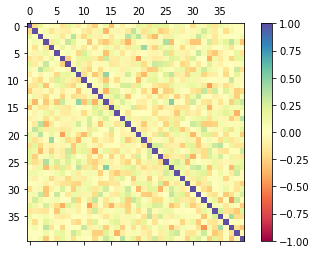

In [138]:
fig, axs = plt.subplots(1,1)
caxs = axs.matshow(mat_cov_40, cmap='Spectral', vmin=-1, vmax=1,interpolation='nearest')
fig.colorbar(caxs)
plt.show()

In [139]:
entradas_diag_10 = np.diagonal(mat_cov_40)
media_10 = np.mean(entradas_diag_10)
sd_10 = np.std(entradas_diag_10)
print(media_10)
print(sd_10)

1.0
8.418682910850739e-17


In [140]:
entradas_no_diag = mat_cov_40[np.where(~np.eye(mat_cov_40.shape[0],dtype=bool))]
media_10_nd = np.mean(entradas_no_diag)
sd_10_nd = np.std(entradas_no_diag)
print(media_10_nd)
print(sd_10_nd)

-0.009058940432352766
0.16101131337573502


Es posible observar que con una meustra de tamaño 10, la media de los valores propios de la diagonal es distinta de 1 y la desviación estándar es de 0.38, mientras que la media de las entradas fuera de la diagonal es cercana a cero (pero no es cero) y tiene una desviación estándar similar a la de las entradas en la diagonal. Esto es interesante pues muestra que existe "ruido" al obtener la matriz de varianza covarianza.

Se realiza a continuación el mismo experimento pero esta vez se aumenta el número de observaciones en la matriz de 40 a 1000

In [141]:
p = 40
n = 100
n_40 = np.random.standard_normal(p*n)
n_40 = n_40.reshape(n,p)
#mat_cov_40 = 1/n * np.matmul( n_40.transpose(), n_40)
mat_cov_40 = np.corrcoef(n_40.T)

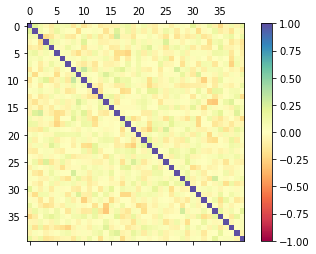

In [142]:
fig, axs = plt.subplots(1,1)
caxs = axs.matshow(mat_cov_40, cmap='Spectral', vmin=-1, vmax=1,interpolation='nearest')
fig.colorbar(caxs)
plt.show()

Se procede a calcular la media y la desviación estándar de los valores en las diagonales 

In [143]:
entradas_diag_1000 = np.diagonal(mat_cov_40)
media_1000 = np.mean(entradas_diag_1000)
sd_1000 = np.std(entradas_diag_1000)
print(media_1000)
print(sd_1000)

1.0
7.447602459741819e-17


Ahora se calcula la media y la desviación estándar de los valores fuera de la diagonal

In [144]:
entradas_no_diag = mat_cov_40[np.where(~np.eye(mat_cov_40.shape[0],dtype=bool))]
media_1000_nd = np.mean(entradas_no_diag)
sd_1000_nd = np.std(entradas_no_diag)
print(media_1000_nd)
print(sd_1000_nd)

-0.0012984946111948706
0.0974381712671118


Se puede observar que al aumentar el tamaño de la muestra, se tiene que los valores de la matriz de varianza covarianza se acercan más a los valores teóricos (las entradas de la diagonal deberían ser 1 y las que están fuera de la diagonal deberían ser 0), es decir, aumentar el tamaño de muestra reduce el ruido, sin embargo es necesario notar que dicho ruido aún existe. 

## Diapositiva 16

En este ejercicio se simulan matrices de varianza covarianza a partir de matrices con entradas gaussianas estándar de dimensión 30 x 30 y se multiplica esta matriz por otra matriz diagonal de constantes. 

La gráfica de los 30 valores propios ordenados de forma descendente se presenta a continuación

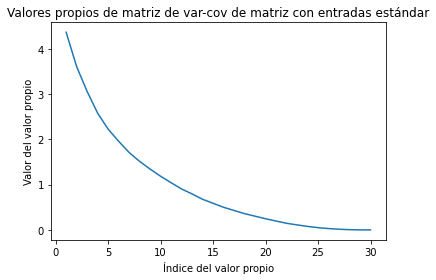

In [243]:
p = 30
n= 30
mean = np.zeros(p)
mat_cov = np.identity(p)
val_prop_todos = []
for i in range(0,100):  
    matriz_Z = np.random.multivariate_normal(mean, mat_cov, n)
    matriz_D = np.sqrt(np.diag(np.append([12, 11, 10, 9, 8, 7], 
                                         np.repeat(3, 24))))
    matriz_X = np.matmul(matriz_D, matriz_Z.transpose())
    matriz_X = (matriz_X - np.mean(matriz_X, axis=0)) / np.std(matriz_X, axis=0)
    matriz_S = np.cov(matriz_X)
    val_prop = np.linalg.eigvals(matriz_S)
    val_prop[::-1].sort()
    val_prop_todos.append(val_prop)
  

val_prop_todos = np.array(val_prop_todos)
medias = val_prop_todos.mean(axis=0)
ind = list(range(1,31))
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('Índice del valor propio')
ax.set_ylabel('Valor del valor propio')
plt.title("Valores propios de matriz de var-cov de matriz con entradas estándar")

ax.plot(ind, medias);

Según el criterio de la varianza explicada, sería necesario tomar los diez primeros vectores propios al realizar PCA para explicar al menos el 80% de la varianza. 

In [240]:
sumas_cum = np.cumsum(medias / np.sum(medias)*100)
sumas_cum[10]

82.06552974779669

Se repite el mismo experimento pero esta aumentando el número de observaciones a 300, es decir, la nueva dimensión es de 300 x 30

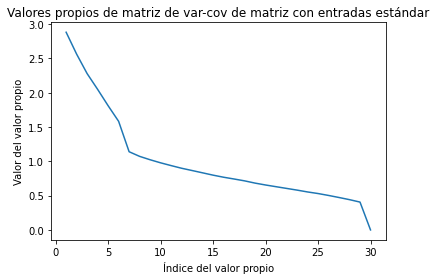

In [245]:
p = 30
n= 300
mean = np.zeros(p)
mat_cov = np.identity(p)
val_prop_todos = []
for i in range(0,100):  
    matriz_Z = np.random.multivariate_normal(mean, mat_cov, n)
    matriz_D = np.sqrt(np.diag(np.append([12, 11, 10, 9, 8, 7], np.repeat(3, 24))))
    matriz_X = np.matmul( matriz_D, matriz_Z.T)
    matriz_X = (matriz_X - np.mean(matriz_X, axis=0)) / np.std(matriz_X, axis=0)
    matriz_S = 1/n * np.matmul( matriz_X, matriz_X.transpose())
    val_prop = np.linalg.eigvals(matriz_S)
    val_prop[::-1].sort()
    val_prop_todos.append(val_prop)


val_prop_todos = np.array(val_prop_todos)
medias = val_prop_todos.mean(axis=0)
ind = list(range(1,31))
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('Índice del valor propio')
ax.set_ylabel('Valor del valor propio')
plt.title("Valores propios de matriz de var-cov de matriz con entradas estándar")

ax.plot(ind, medias);

En este caso, según el criterio de la varianza explicada, sería necesario tomar los 18 primeros vectores propios al realizar PCA para explicar al menos el 80% de la varianza.

In [246]:
sumas_cum = np.cumsum(medias / np.sum(medias)*100)
sumas_cum[18]

82.07643368645617

## Diapositiva 17 y 18

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


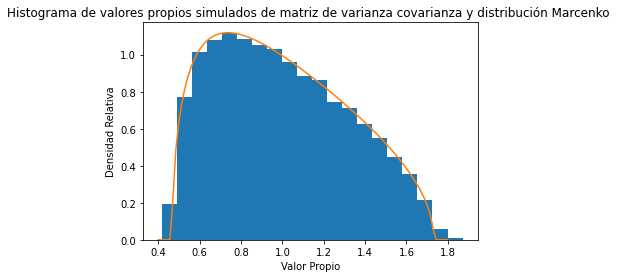

In [30]:
p = 30
n= 300
mean = np.zeros(p)
mat_cov = np.identity(p)
val_prop_todos = []
for i in range(0,1000):  
    #matriz_Z = np.random.multivariate_normal(mean, mat_cov, n)
    matriz_Z = np.random.normal(0,1, ( p, n))
    matriz_S = 1/n * np.matmul( matriz_Z, matriz_Z.transpose())

    #matriz_S = 1/n * np.matmul(matriz_X.transpose(), matriz_X)
    val_prop = np.linalg.eigvals(matriz_S)
    val_prop[::-1].sort()
    val_prop_todos.append(val_prop)

c = p/n
lam_min = (1-np.sqrt(c))**2
lam_max = (1+np.sqrt(c))**2
indices = np.linspace(0.4,1.8,100)
marcenko = (sqrt((lam_max- indices)*(indices - lam_min)))/(2*np.pi * c* indices)
marcenko = np.nan_to_num(marcenko, nan=0)
val_prop_todos = np.array(val_prop_todos).flatten()
plt.hist(val_prop_todos, bins = 20, density=True)
ax = plt.axes()
ax.set_xlabel('Valor Propio')
ax.set_ylabel('Densidad Relativa')
plt.title("Histograma de valores propios simulados de matriz de varianza covarianza y distribución Marcenko ")

plt.plot(indices, marcenko)

## Diapositiva 19

In [250]:
indices[94]

1.7292929292929293

In [251]:
medias_D[medias_D>=indices[94]].shape

(5,)

## Diapositiva 30

In [17]:
#GOE
m = 50000
p = 8
val_prop_todos_goe = []
for iter in range(1,1000):
  H = np.random.randn(p,p) * np.sqrt(1/p)
  H_sim = (H + H.T )/2
  eigenvals = np.linalg.eigvals(H_sim)
  val_prop_todos_goe.append(eigenvals)



In [18]:
val_prop_todos_goe = np.array(val_prop_todos_goe).flatten() 
indices = np.linspace(-np.sqrt(2), np.sqrt(2))
val_teorico = (1/ np.pi) * np.sqrt(2 - indices**2)
val_teorico = np.nan_to_num(val_teorico, nan= 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#GUE
m = 50000
p = 8
val_prop_todos_gue = []
for iter in range(1,1000):
  H = (np.random.randn(p,p) + np.random.randn(p,p)*1j)  * np.sqrt(1/(2*p))
  H_sim = (H + H.conj().T )/2
  eigenvals = np.linalg.eigvals(H_sim)
  val_prop_todos_gue.append(eigenvals)



In [20]:
val_prop_todos_gue = np.array(val_prop_todos_gue).flatten() 
indices = np.linspace(-np.sqrt(2), np.sqrt(2))
val_teorico = (1/ np.pi) * np.sqrt(2 - indices**2)
val_teorico = np.nan_to_num(val_teorico, nan= 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
#GSE
m = 50000
p = 8
val_prop_todos_GSE= []
for iter in range(1,m):
  matA =  np.sqrt(1/(4*p)) * (np.random.normal(p,p) + np.random.normal(p,p)*1j)
  matB =  np.sqrt(1/(4*p))* (np.random.normal(p,p) + np.random.normal(p,p)*1j)
  #matA = (matA + matA.conj().T)/2
  #matA = (matB + matB.conj().T)/2
  #matA = (np.random.rand(p,p) + np.random.rand(p,p)*1j)
  #matB =  (np.random.rand(p,p) + np.random.rand(p,p)*1j)
  simplectica = np.block([[matA, matB],[ -matB.conjugate(), matA.conjugate()]])
  simplectica_h = (simplectica + simplectica.T.conjugate())/2
  W,H = np.linalg.eigh(simplectica_h)
  val_prop_todos_GSE.append(W)



In [46]:
val_prop_todos_GSE = np.sort(np.array(val_prop_todos).flatten())
indices = np.linspace(-np.sqrt(2), np.sqrt(2))
val_teorico = (1/ np.pi) * np.sqrt(2 - indices**2)
val_teorico = np.nan_to_num(val_teorico, nan= 0)
max_bool = val_prop_todos >0.6
val_prop_todos[max_bool] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


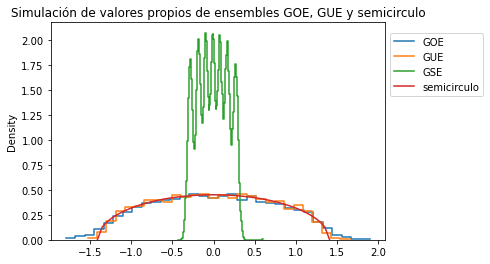

In [50]:
sns.histplot(data = val_prop_todos_goe, stat = "density", element = "step", fill = False, label="GOE")
sns.histplot(data = val_prop_todos_gue.real, stat = "density", element = "step", fill = False, label="GUE")
sns.histplot(data = val_prop_todos_GSE.real, stat = "density", element = "step", fill = False, label="GSE")
plt.plot(indices, val_teorico,label=r"semicirculo")
plt.title("Simulación de valores propios de ensembles GOE, GUE y semicirculo")
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

In [12]:
#GOE
m = 10000
p = 100
val_prop_todos_goe_100 = []
for iter in range(1,1000):
  H = np.random.randn(p,p) * np.sqrt(1/p)
  H_sim = (H + H.T )/2
  eigenvals = np.linalg.eigvals(H_sim)
  val_prop_todos_goe_100.append(eigenvals)



In [13]:
val_prop_todos_goe_100 = np.array(val_prop_todos_goe_100).flatten() 
indices = np.linspace(-np.sqrt(2), np.sqrt(2))
val_teorico = (1/ np.pi) * np.sqrt(2 - indices**2)
val_teorico = np.nan_to_num(val_teorico, nan= 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#GUE

m = 10000
p = 100
val_prop_todos_gue_100 = []
for iter in range(1,1000):
  H = (np.random.randn(p,p) + np.random.randn(p,p)*1j)  * np.sqrt(1/(2*p))
  H_sim = (H + H.conj().T )/2
  eigenvals = np.linalg.eigvals(H_sim)
  val_prop_todos_gue_100.append(eigenvals)



In [15]:
val_prop_todos_gue_100 = np.array(val_prop_todos_gue_100).flatten() 
indices = np.linspace(-np.sqrt(2), np.sqrt(2))
val_teorico = (1/ np.pi) * np.sqrt(2 - indices**2)
val_teorico = np.nan_to_num(val_teorico, nan= 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


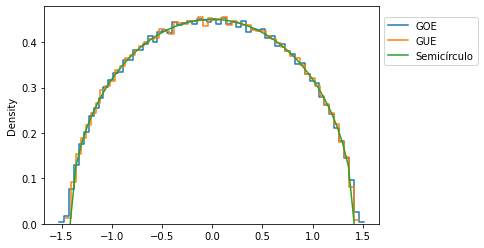

In [16]:
sns.histplot(data = val_prop_todos_goe_100, stat = "density", element = "step", fill = False, label ="GOE")
sns.histplot(data = val_prop_todos_gue_100.real, stat = "density", element = "step", fill = False, label="GUE")
plt.plot(indices, val_teorico, label = r"Semicírculo")
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))